In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load the data from database
file_path = './Resources/clean_beer.csv'
beer_df = pd.read_csv(file_path)
beer_df.head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_style,beer_abv
0,4.0,4.0,3.5,4.0,4.0,Rauchbier,7.4
1,3.5,3.5,3.5,3.5,3.5,American IPA,6.1
2,1.0,3.0,3.0,1.5,1.5,Euro Pale Lager,5.0
3,2.5,3.0,4.0,4.0,3.5,Witbier,4.8
4,3.5,4.0,4.0,3.5,3.5,American Porter,6.0


In [3]:
beer_style_count = beer_df.beer_style.value_counts()
beer_style_count

American IPA                      382
American Pale Ale (APA)           236
American Double / Imperial IPA    234
American Porter                   185
Saison / Farmhouse Ale            181
                                 ... 
American Malt Liquor                3
Gose                                2
Japanese Rice Lager                 2
Kvass                               2
Faro                                1
Name: beer_style, Length: 103, dtype: int64

<AxesSubplot:ylabel='Density'>

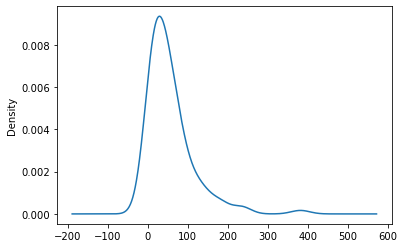

In [5]:
beer_style_count.plot.density()

In [8]:
replace_beer = list(beer_style_count[beer_style_count < 50].index)
for beer in replace_beer:
    beer_df.beer_style = beer_df.beer_style.replace(beer,"Other")
    
# Check to make sure binning was successful
beer_df.beer_style.value_counts()

Other                                  1319
American IPA                            382
American Pale Ale (APA)                 236
American Double / Imperial IPA          234
American Porter                         185
Saison / Farmhouse Ale                  181
American Amber / Red Ale                179
Belgian Strong Dark Ale                 152
Russian Imperial Stout                  144
Belgian Strong Pale Ale                 134
American Double / Imperial Stout        134
Tripel                                  128
Fruit / Vegetable Beer                  127
Hefeweizen                              112
American Barleywine                     109
American Stout                          106
Witbier                                  98
Extra Special / Strong Bitter (ESB)      94
Belgian Pale Ale                         92
English Pale Ale                         90
American Strong Ale                      90
American Brown Ale                       82
English Brown Ale               

In [9]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [13]:
beer_cat = beer_df.dtypes[beer_df.dtypes == "object"].index.tolist()
beer_cat

['beer_style']